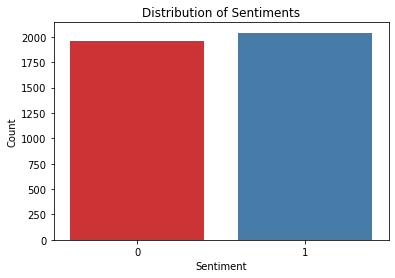

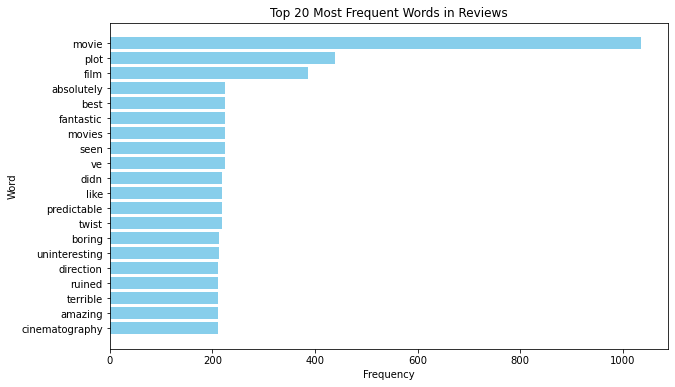

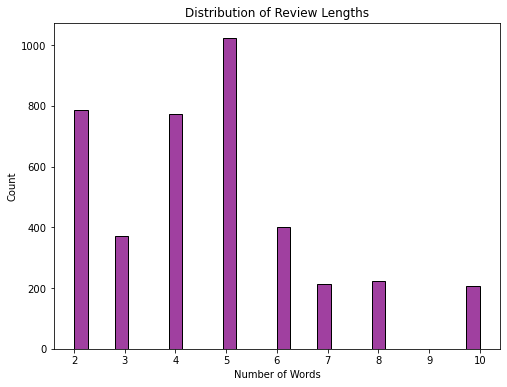

Accuracy: 0.49875
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.43      0.47       408
           1       0.49      0.57      0.53       392

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

Review: This movie was amazing! --> Sentiment: Negative
Review: The worst movie I've ever seen. --> Sentiment: Negative
Review: Not worth watching. --> Sentiment: Negative
Review: I loved the plot twists! --> Sentiment: Positive
Review: The acting was superb. --> Sentiment: Positive
Review: Couldn't stop laughing throughout the movie. --> Sentiment: Negative


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the movie review data
movie_reviews_df = pd.read_csv("movie_reviews.csv")

# Exploratory Data Analysis (EDA)
# Distribution of sentiments
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=movie_reviews_df, palette='Set1')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize the most frequent words in the reviews
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = count_vectorizer.fit_transform(movie_reviews_df['Review'])
words = count_vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1
word_freq_dict = dict(zip(words, word_frequencies))
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]

plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_word_freq], [x[1] for x in sorted_word_freq], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.gca().invert_yaxis()
plt.show()

# Analyze the distribution of review lengths
review_lengths = movie_reviews_df['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(review_lengths, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

# Sentiment Analysis and Prediction
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(movie_reviews_df['Review'], 
                                                    movie_reviews_df['Sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Vectorize the reviews
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_train_vectorized = count_vectorizer.fit_transform(X_train)
X_test_vectorized = count_vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Prediction on New Test Data
new_reviews = [
    "This movie was amazing!",
    "The worst movie I've ever seen.",
    "Not worth watching.",
    "I loved the plot twists!",
    "The acting was superb.",
    "Couldn't stop laughing throughout the movie."
]

# Vectorize the new reviews
new_reviews_vectorized = count_vectorizer.transform(new_reviews)

# Make predictions on the new test data
new_predictions = model.predict(new_reviews_vectorized)

# Print the predictions
for review, prediction in zip(new_reviews, new_predictions):
    print(f"Review: {review} --> Sentiment: {'Positive' if prediction == 1 else 'Negative'}")
